In [1]:
import polars as pl

In [2]:
from polars import col

## plan lazy y aplicacion de una consulta

In [7]:
query =(
    pl.scan_parquet('/content/vuelos.parquet')
    .with_columns(tiempo_aire_hrs=pl.col('AIR_TIME')/60)
    .filter(pl.col('MONTH')>7)
)

In [8]:
query

In [9]:
query.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,tiempo_aire_hrs
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32,f64
2015,8,1,6,"""NK""",298,"""N614NK""","""LAS""","""IAH""",3,55,52,12,107,177,173,153,1222,540,8,500,548,48,0,0,null,48,0,0,0,0,2.55
2015,8,1,6,"""AA""",1965,"""N587UW""","""SFO""","""CLT""",5,16,11,17,33,303,291,260,2296,753,14,808,807,-1,0,0,null,null,null,null,null,null,4.333333
2015,8,1,6,"""NK""",612,"""N631NK""","""LAS""","""MSP""",5,37,32,11,48,175,165,149,1299,517,5,500,522,22,0,0,null,22,0,0,0,0,2.483333
2015,8,1,6,"""AA""",260,"""N3BPAA""","""LAX""","""MIA""",10,8,-2,23,31,312,307,278,2342,809,6,822,815,-7,0,0,null,null,null,null,null,null,4.633333
2015,8,1,6,"""AA""",448,"""N165US""","""SLC""","""CLT""",15,54,39,16,110,234,219,198,1727,628,5,609,633,24,0,0,null,0,0,2,22,0,3.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null,4.533333
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null,3.25
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null,3.283333


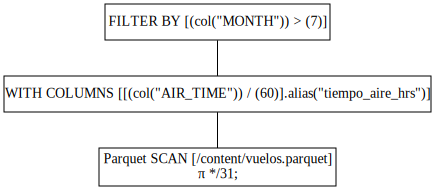

In [10]:
query.show_graph(optimized=False)

## se lee de abajo hacia arriba, ejemplor cada rectangulo correponde a una etapa del plan de consulta
##el simbolo,sigma significa a seleccion
##el simbolo pi proyeccion de un conjunto de columnas

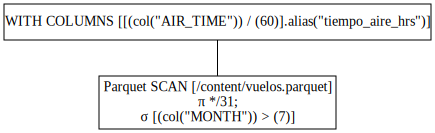

In [11]:
query.show_graph()

## alternativa de visualizacion del plan de consulta

In [12]:
query.explain(optimized=False)

'FILTER [(col("MONTH")) > (7)] FROM\n   WITH_COLUMNS:\n   [[(col("AIR_TIME")) / (60)].alias("tiempo_aire_hrs")] \n    Parquet SCAN [/content/vuelos.parquet]\n    PROJECT */31 COLUMNS'

In [13]:
query.explain()

' WITH_COLUMNS:\n [[(col("AIR_TIME")) / (60)].alias("tiempo_aire_hrs")] \n  Parquet SCAN [/content/vuelos.parquet]\n  PROJECT */31 COLUMNS\n  SELECTION: [(col("MONTH")) > (7)]'

## nos brinda el mejor resultado posible

In [15]:
query.collect()## consulta en el dataset completo 2,4 que coinciden con el resultado

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,tiempo_aire_hrs
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32,f64
2015,8,1,6,"""NK""",298,"""N614NK""","""LAS""","""IAH""",3,55,52,12,107,177,173,153,1222,540,8,500,548,48,0,0,null,48,0,0,0,0,2.55
2015,8,1,6,"""AA""",1965,"""N587UW""","""SFO""","""CLT""",5,16,11,17,33,303,291,260,2296,753,14,808,807,-1,0,0,null,null,null,null,null,null,4.333333
2015,8,1,6,"""NK""",612,"""N631NK""","""LAS""","""MSP""",5,37,32,11,48,175,165,149,1299,517,5,500,522,22,0,0,null,22,0,0,0,0,2.483333
2015,8,1,6,"""AA""",260,"""N3BPAA""","""LAX""","""MIA""",10,8,-2,23,31,312,307,278,2342,809,6,822,815,-7,0,0,null,null,null,null,null,null,4.633333
2015,8,1,6,"""AA""",448,"""N165US""","""SLC""","""CLT""",15,54,39,16,110,234,219,198,1727,628,5,609,633,24,0,0,null,0,0,2,22,0,3.3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null,4.533333
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null,3.25
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null,3.283333


## los lazy frame son planes de consulta una promesa de calculo, utilicemos despues se va a calcular de nuevo en ese plan de consulta
##  si se necesita mas memoria de la que se necesita se aplica el modo streaming=True habilitamos ese modo

## LA API LAZY no cuenta cuantas columnas hay en cada etapa de la consulta

In [18]:
query = (
    pl.scan_parquet('/content/vuelos.parquet')
    .filter(pl.col('AIR_TIME')>100)
)
query.fetch(n_rows=20)  ## 20 filas de esta consulta

<ipython-input-18-ace87dc2035d>:5: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query.fetch(n_rows=20)  ## 20 filas de esta consulta


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,1,1,4,"""AS""",108,"""N309AS""","""ANC""","""SEA""",45,41,-4,17,58,204,194,173,1448,451,4,509,455,-14,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",1560,"""N3743H""","""ANC""","""SEA""",45,31,-14,25,56,210,200,171,1448,447,4,515,451,-24,0,0,null,null,null,null,null,null
2015,1,1,4,"""UA""",1197,"""N78448""","""SFO""","""IAH""",48,42,-6,11,53,218,217,199,1635,612,7,626,619,-7,0,0,null,null,null,null,null,null
